## Load and Explore Dataset

In [1]:
import pandas as pd

# Load the dataset
df_wine = pd.read_csv('wine.csv')

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
print(df_wine.head())
print("\n")

# Print the data types of each column
print("Data types of each column:")
print(df_wine.info())
print("\n")

# Generate and display descriptive statistics for numerical columns
print("Descriptive statistics for numerical columns:")
print(df_wine.describe())
print("\n")

# Check for and display the count of missing values in each column
print("Count of missing values in each column:")
print(df_wine.isnull().sum())

First 5 rows of the DataFrame:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 1

## Feature Distribution Analysis

Generating histograms for each feature:


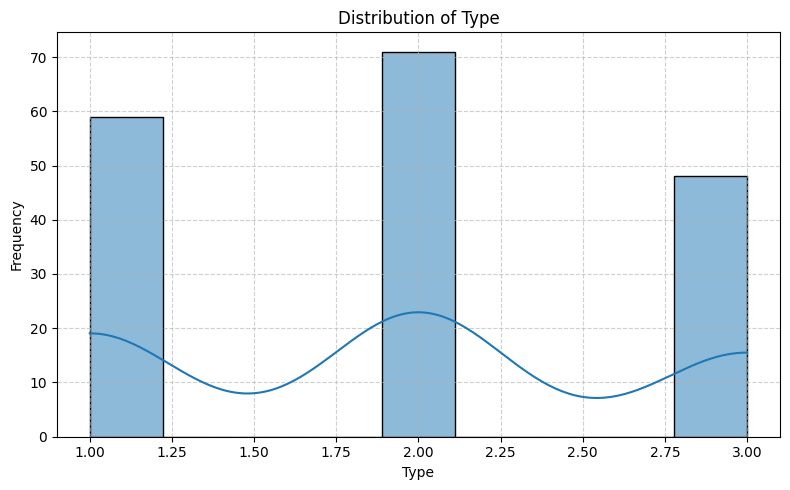

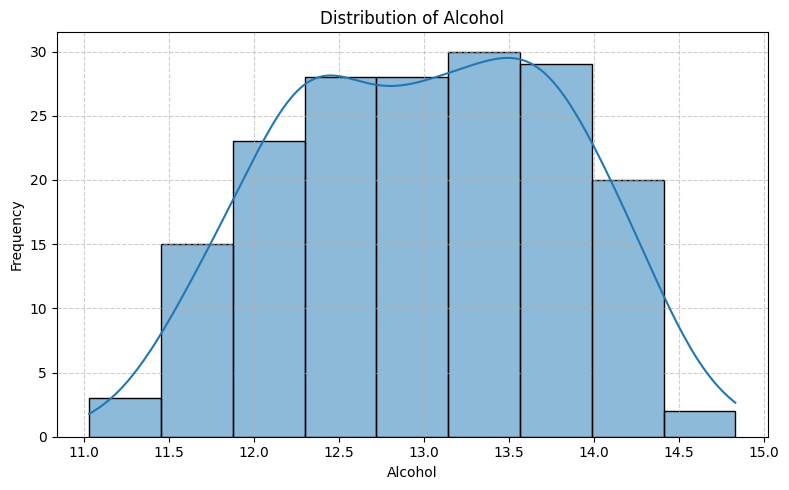

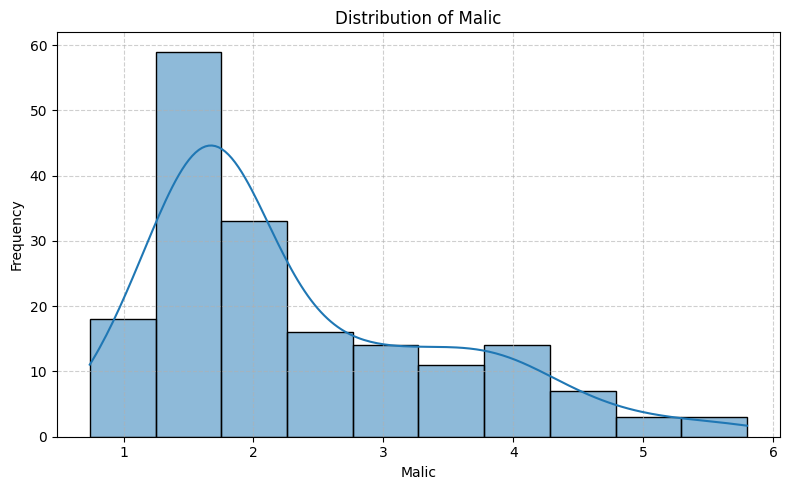

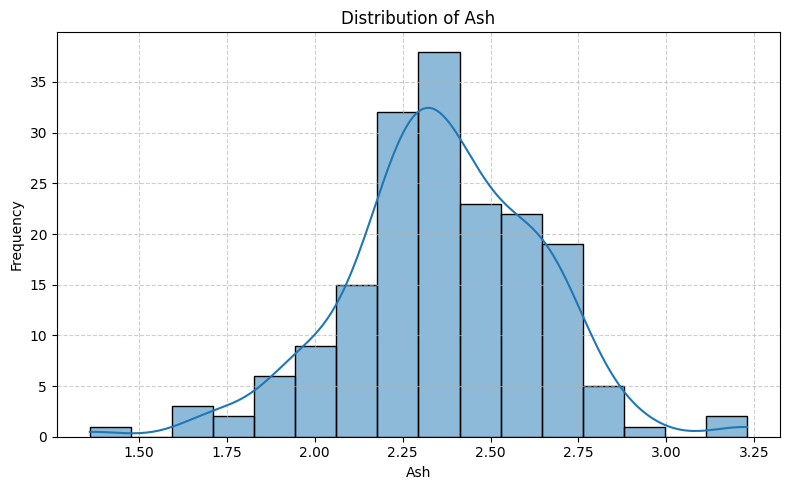

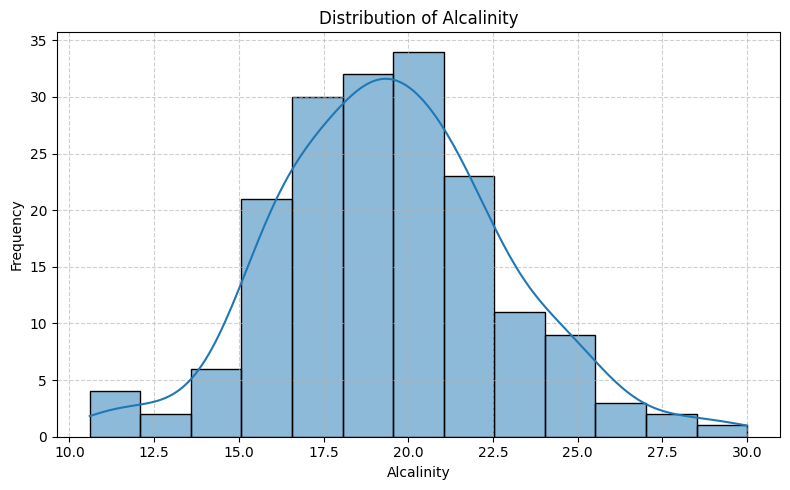

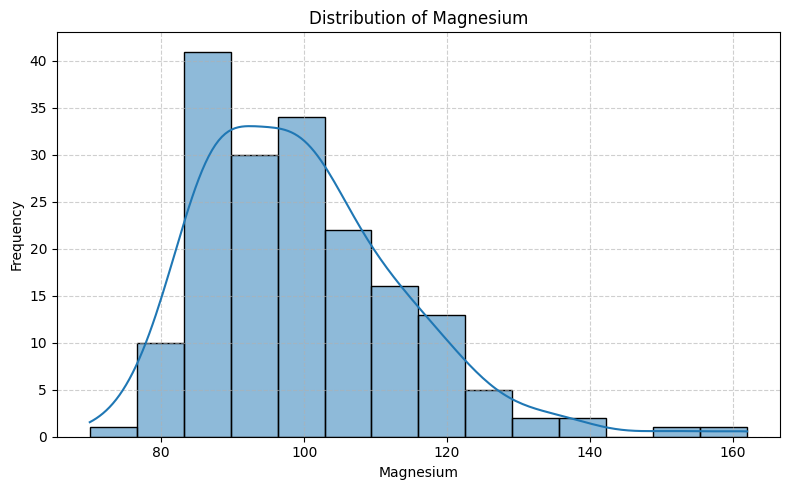

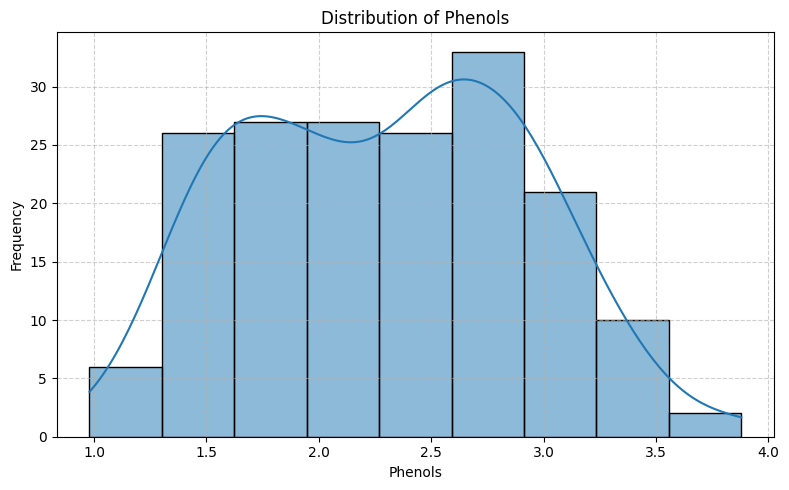

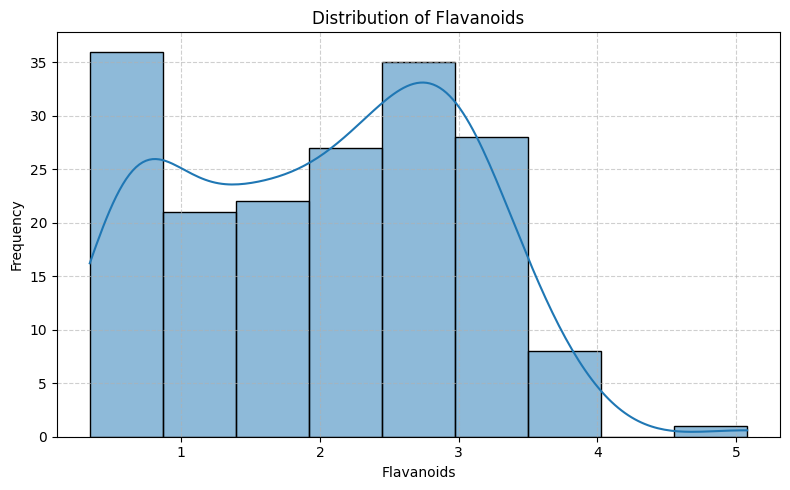

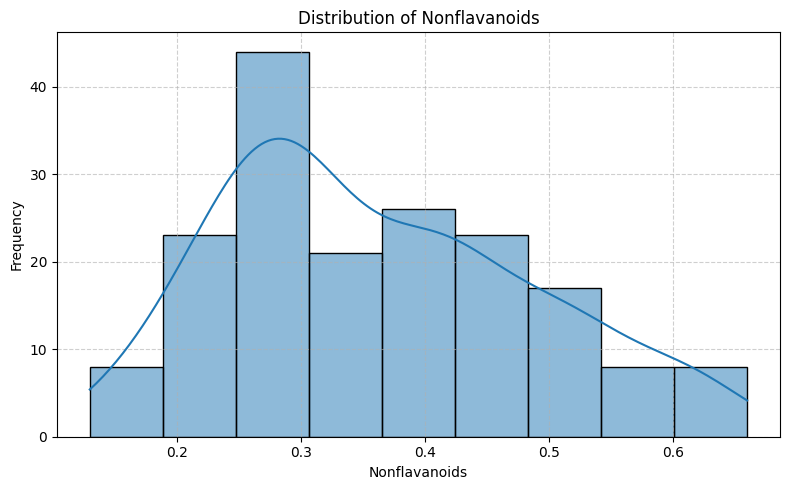

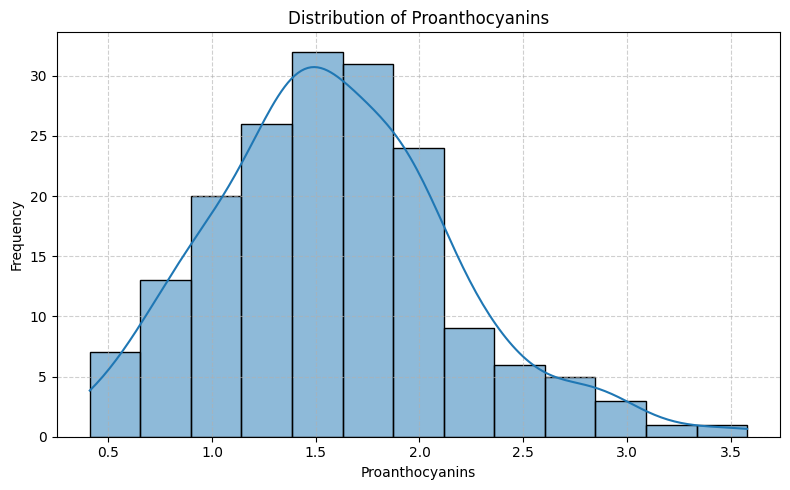

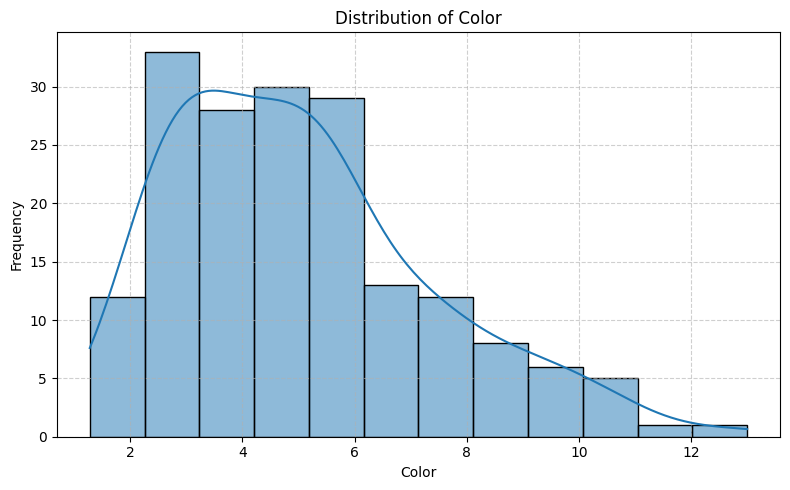

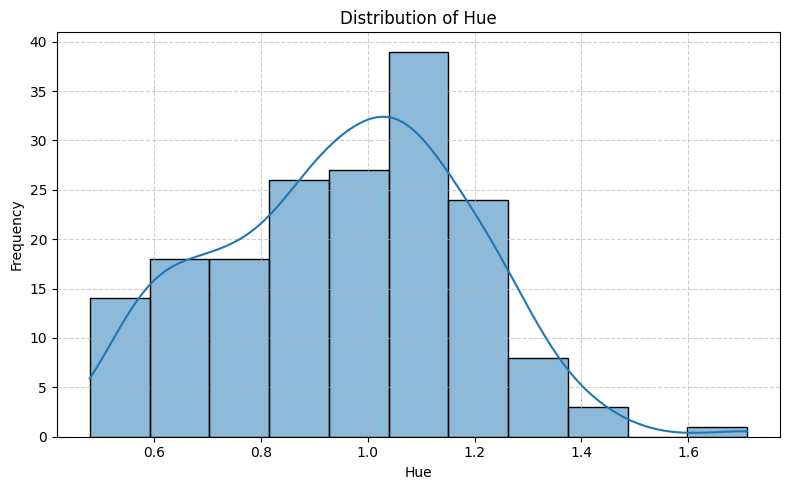

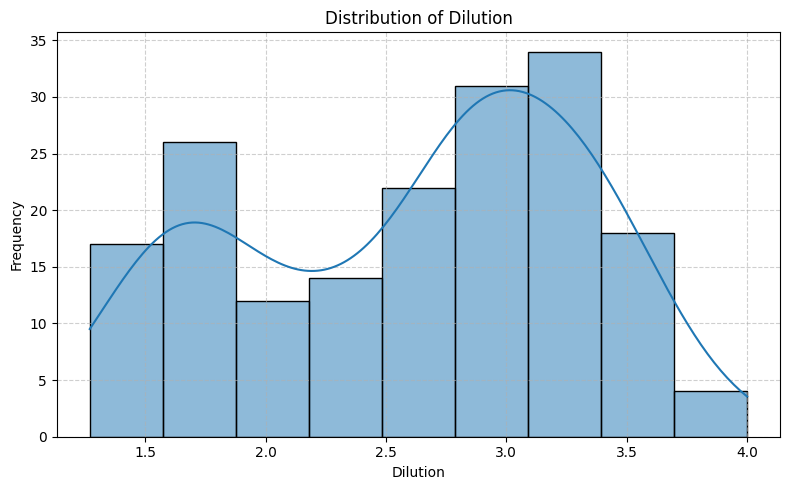

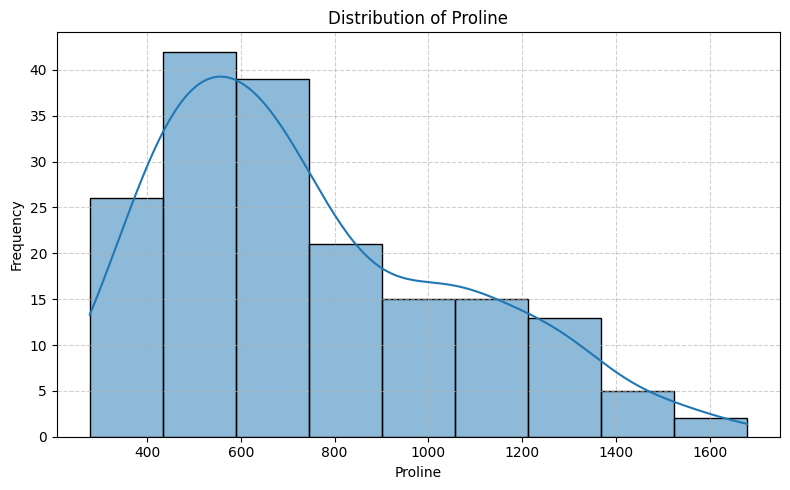

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Generating histograms for each feature:")
# Iterate through each column in the DataFrame
for column in df_wine.columns:
    plt.figure(figsize=(8, 5)) # Create a new figure for each plot
    sns.histplot(df_wine[column], kde=True) # Create a histogram with KDE
    plt.title(f'Distribution of {column}') # Set title
    plt.xlabel(column) # Set x-axis label
    plt.ylabel('Frequency') # Set y-axis label
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show() # Display the plot

## Correlation Analysis


Correlation Matrix:
                Type   Alcohol     Malic       Ash  Alcalinity  Magnesium  \
Type        1.000000 -0.328222  0.437776 -0.049643    0.517859  -0.209179   
Alcohol    -0.328222  1.000000  0.094397  0.211545   -0.310235   0.270798   
Malic       0.437776  0.094397  1.000000  0.164045    0.288500  -0.054575   
Ash        -0.049643  0.211545  0.164045  1.000000    0.443367   0.286587   
Alcalinity  0.517859 -0.310235  0.288500  0.443367    1.000000  -0.083333   

             Phenols  Flavanoids  Nonflavanoids  Proanthocyanins     Color  \
Type       -0.719163   -0.847498       0.489109        -0.499130  0.265668   
Alcohol     0.289101    0.236815      -0.155929         0.136698  0.546364   
Malic      -0.335167   -0.411007       0.292977        -0.220746  0.248985   
Ash         0.128980    0.115077       0.186230         0.009652  0.258887   
Alcalinity -0.321113   -0.351370       0.361922        -0.197327  0.018732   

                 Hue  Dilution   Proline  
Type 

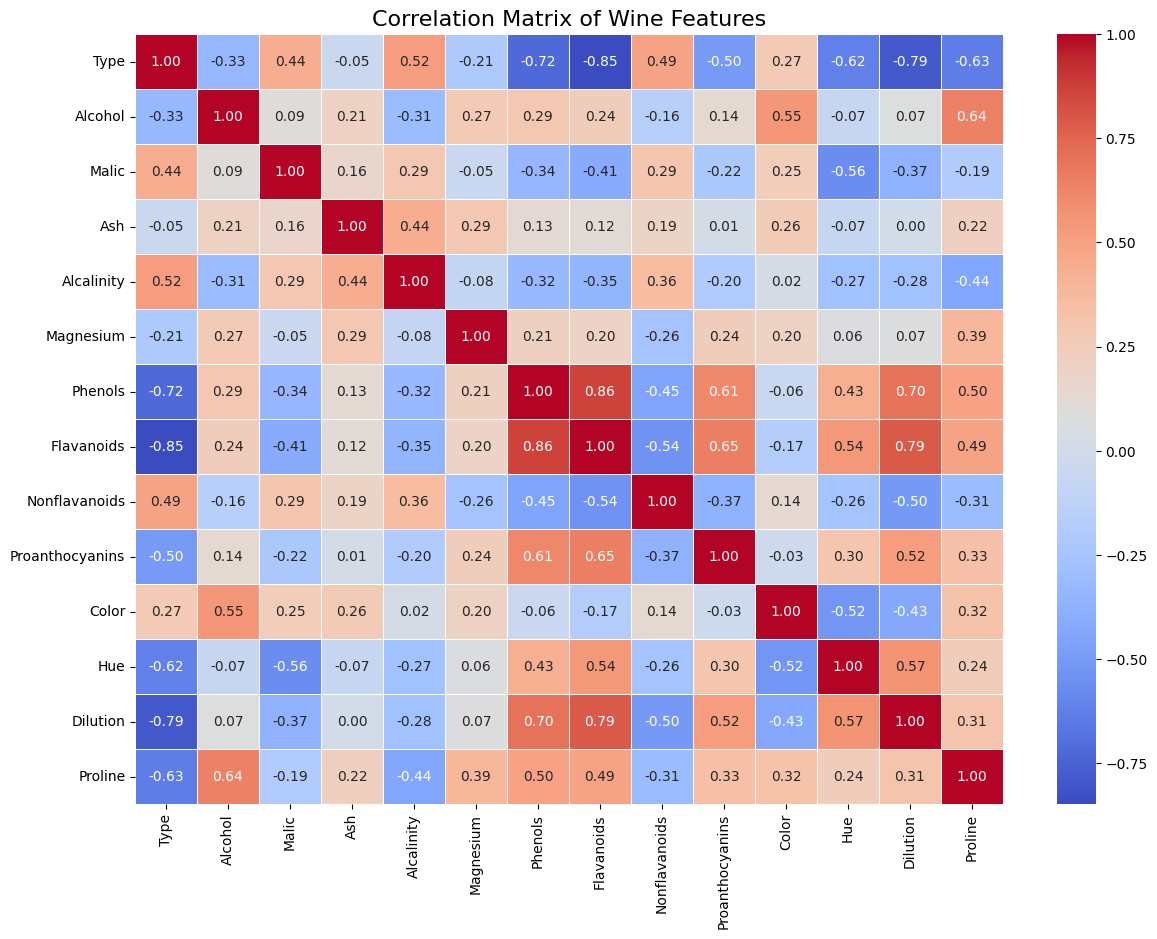

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_wine.corr()

print("Correlation Matrix:")
print(correlation_matrix.head())

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add a title to the heatmap
plt.title('Correlation Matrix of Wine Features', fontsize=16)

# Display the plot
plt.show()

## Standardize Features


Standardization is essential before applying PCA because PCA is sensitive to the scale of the features. Features with larger ranges can dominate the principal components, even if they have less variance intrinsically. `StandardScaler` transforms the data so that it has a mean of 0 and a standard deviation of 1, which helps ensure that all features contribute equally to the PCA. The 'Type' column is dropped because it represents the target variable (wine class) and should not be included in the feature scaling for unsupervised clustering tasks.

In [4]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Create features_df by dropping the 'Type' column
features_df = df_wine.drop('Type', axis=1)

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the features_df
df_scaled = pd.DataFrame(scaler.fit_transform(features_df), columns=features_df.columns)

print("First 5 rows of the scaled DataFrame:")
print(df_scaled.head())

First 5 rows of the scaled DataFrame:
    Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  Flavanoids  \
0  1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997    1.034819   
1  0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648    0.733629   
2  0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997    1.215533   
3  1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446    1.466525   
4  0.295700  0.227694  1.840403    0.451946   1.281985  0.808997    0.663351   

   Nonflavanoids  Proanthocyanins     Color       Hue  Dilution   Proline  
0      -0.659563         1.224884  0.251717  0.362177  1.847920  1.013009  
1      -0.820719        -0.544721 -0.293321  0.406051  1.113449  0.965242  
2      -0.498407         2.135968  0.269020  0.318304  0.788587  1.395148  
3      -0.981875         1.032155  1.186068 -0.427544  1.184071  2.334574  
4       0.226796         0.401404 -0.319276  0.362177  0.449601 -0.037874  


## Apply PCA

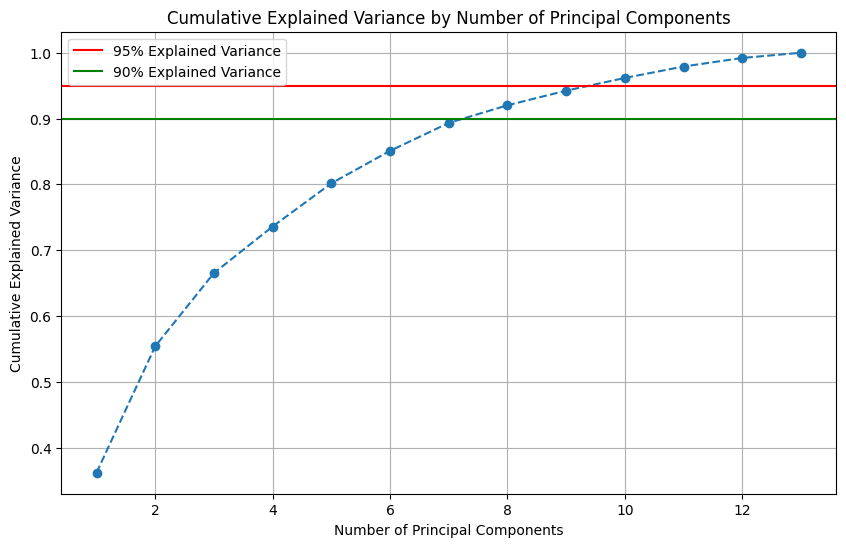

Number of components explaining at least 95% of the variance: 10
Shape of PCA-transformed DataFrame: (178, 10)
First 5 rows of PCA-transformed DataFrame:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2  2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3  3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4  1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   

        PC8       PC9      PC10  
0 -0.065139 -0.641443  1.020956  
1 -1.024416  0.308847  0.159701  
2  0.344216  1.177834  0.113361  
3 -0.643593 -0.052544  0.239413  
4 -0.416700 -0.326819 -0.078366  


In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 2. Instantiate PCA without specifying n_components to compute all principal components.
pca = PCA()

# 3. Fit PCA to df_scaled
pca.fit(df_scaled)

# 4. Plot the explained variance ratio to visualize the cumulative explained variance.
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.axhline(y=0.90, color='g', linestyle='-', label='90% Explained Variance')
plt.legend()
plt.show()

# 5. Based on the plot, identify the optimal number of components (e.g., components explaining 90-95% of the variance).
# Find the number of components for 95% variance
num_components_95 = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1
print(f"Number of components explaining at least 95% of the variance: {num_components_95}")

# 6. Instantiate PCA again with the chosen number of components.
# For example, let's choose num_components_95 as the optimal number.
pca_optimal = PCA(n_components=num_components_95)

# 7. Transform df_scaled using the new PCA model and store the result in df_pca_transformed.
df_pca_transformed = pca_optimal.fit_transform(df_scaled)

# Convert to DataFrame for easier inspection if needed (optional)
df_pca_transformed = pd.DataFrame(df_pca_transformed, columns=[f'PC{i+1}' for i in range(num_components_95)])

# 8. Display the shape of df_pca_transformed.
print(f"Shape of PCA-transformed DataFrame: {df_pca_transformed.shape}")
print("First 5 rows of PCA-transformed DataFrame:")
print(df_pca_transformed.head())

## Clustering with Original Data

Performing Elbow Method to find optimal number of clusters...


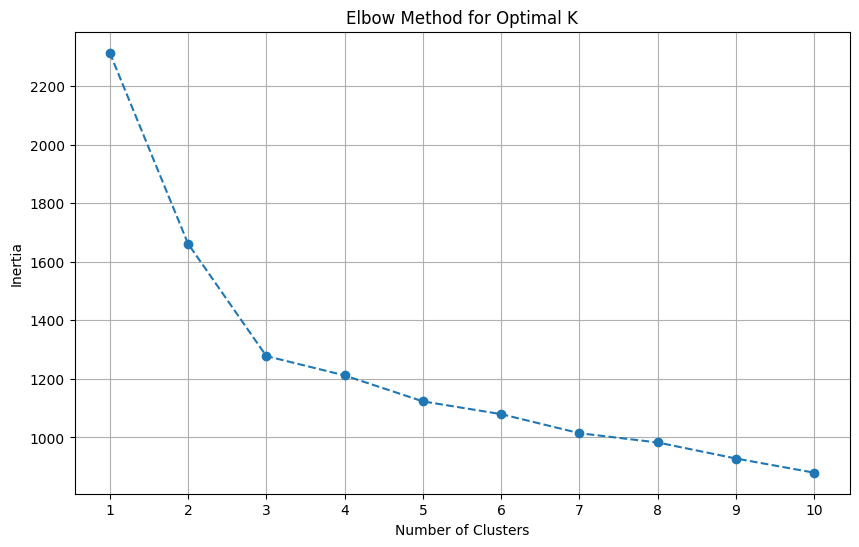

Optimal number of clusters (optimal_k) chosen by Elbow Method: 3
Applying K-means clustering with 3 clusters to df_scaled...
First 5 rows of df_scaled_clusters with assigned clusters:
    Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  Flavanoids  \
0  1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997    1.034819   
1  0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648    0.733629   
2  0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997    1.215533   
3  1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446    1.466525   
4  0.295700  0.227694  1.840403    0.451946   1.281985  0.808997    0.663351   

   Nonflavanoids  Proanthocyanins     Color       Hue  Dilution   Proline  \
0      -0.659563         1.224884  0.251717  0.362177  1.847920  1.013009   
1      -0.820719        -0.544721 -0.293321  0.406051  1.113449  0.965242   
2      -0.498407         2.135968  0.269020  0.318304  0.788587  1.395148   
3      -0.981875         1.

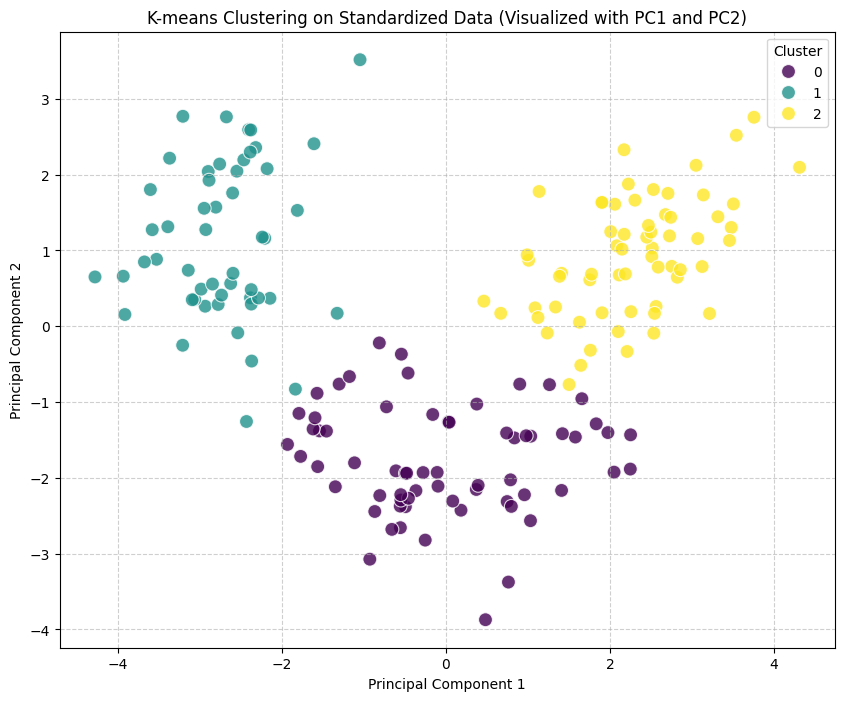

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# 2. Use the Elbow Method to determine the optimal number of clusters for df_scaled
print("Performing Elbow Method to find optimal number of clusters...")
inertia = []
# Loop through a range of cluster numbers (e.g., from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters.
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Based on the plot, identify the 'elbow' point to select the optimal number of clusters.
# Visual inspection typically suggests an elbow around 3 clusters for this dataset.
optimal_k = 3 # Chosen by visual inspection of the elbow plot
print(f"Optimal number of clusters (optimal_k) chosen by Elbow Method: {optimal_k}")

# 3. Apply K-means clustering to df_scaled using the optimal_k
print(f"Applying K-means clustering with {optimal_k} clusters to df_scaled...")
kmeans_optimal = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
kmeans_optimal.fit(df_scaled)

# Predict the cluster labels
df_scaled_clusters = df_scaled.copy()
df_scaled_clusters['Cluster'] = kmeans_optimal.predict(df_scaled)

print("First 5 rows of df_scaled_clusters with assigned clusters:")
print(df_scaled_clusters.head())

# 4. Visualize the clustering results using the first two principal components from df_pca_transformed
print("Visualizing clustering results with PC1 and PC2...")
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_pca_transformed['PC1'],
    y=df_pca_transformed['PC2'],
    hue=df_scaled_clusters['Cluster'],
    palette='viridis',
    s=100, # size of points
    alpha=0.8 # transparency
)
plt.title('K-means Clustering on Standardized Data (Visualized with PC1 and PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## Evaluate Clustering (Original Data)

In [7]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Get the cluster labels from df_scaled_clusters
cluster_labels_original = df_scaled_clusters['Cluster']

# Calculate Silhouette Score for clustering on original scaled data
silhouette_avg_original = silhouette_score(df_scaled, cluster_labels_original)
print(f"Silhouette Score for K-means on Original Scaled Data: {silhouette_avg_original:.3f}")

# Calculate Davies-Bouldin Index for clustering on original scaled data
davies_bouldin_original = davies_bouldin_score(df_scaled, cluster_labels_original)
print(f"Davies-Bouldin Index for K-means on Original Scaled Data: {davies_bouldin_original:.3f}")

Silhouette Score for K-means on Original Scaled Data: 0.285
Davies-Bouldin Index for K-means on Original Scaled Data: 1.389


## Clustering with PCA Data


Applying K-means clustering with 3 clusters to df_pca_transformed...
First 5 rows of df_pca_transformed_clusters with assigned clusters:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2  2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3  3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4  1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   

        PC8       PC9      PC10  Cluster  
0 -0.065139 -0.641443  1.020956        2  
1 -1.024416  0.308847  0.159701        2  
2  0.344216  1.177834  0.113361        2  
3 -0.643593 -0.052544  0.239413        2  
4 -0.416700 -0.326819 -0.078366        2  
Visualizing clustering results on PCA-transformed data...


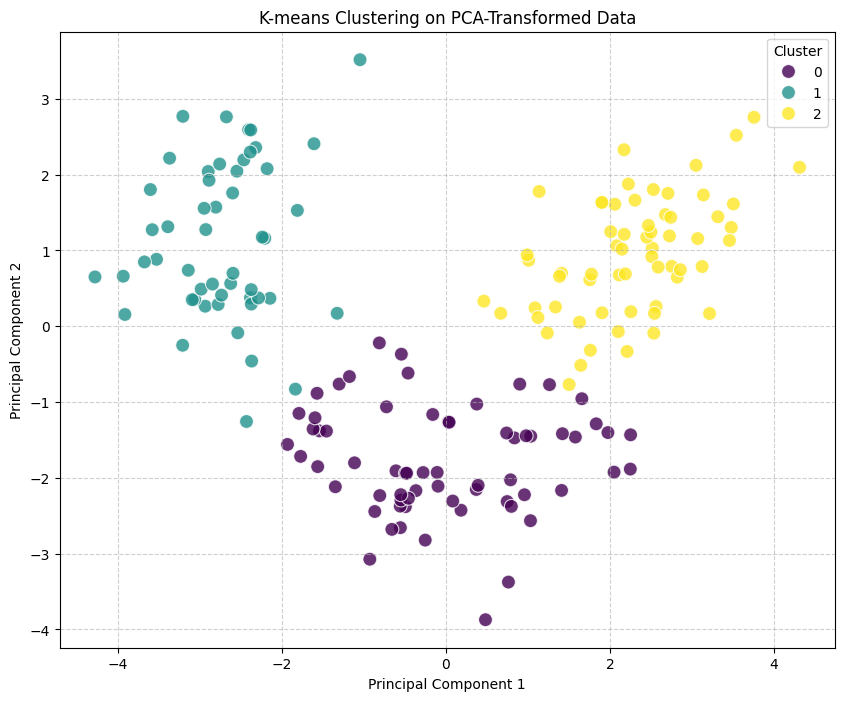

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Apply K-means clustering to the df_pca_transformed DataFrame using the optimal_k (which is 3)
print(f"Applying K-means clustering with {optimal_k} clusters to df_pca_transformed...")
kmeans_pca = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
kmeans_pca.fit(df_pca_transformed)

# 2. Add the resulting cluster labels as a new column named 'Cluster' to df_pca_transformed
df_pca_transformed_clusters = df_pca_transformed.copy()
df_pca_transformed_clusters['Cluster'] = kmeans_pca.predict(df_pca_transformed)

print("First 5 rows of df_pca_transformed_clusters with assigned clusters:")
print(df_pca_transformed_clusters.head())

# 3. Create a scatter plot of the PCA-transformed data, using 'PC1' on the x-axis and 'PC2' on the y-axis.
# 4. Color the points in the scatter plot according to their assigned 'Cluster' labels.
# 5. Add a title to the plot, such as 'K-means Clustering on PCA-Transformed Data'.
# 6. Label the x-axis as 'Principal Component 1' and the y-axis as 'Principal Component 2'.
# 7. Include a legend to distinguish between the different clusters.
print("Visualizing clustering results on PCA-transformed data...")
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_pca_transformed_clusters['PC1'],
    y=df_pca_transformed_clusters['PC2'],
    hue=df_pca_transformed_clusters['Cluster'],
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('K-means Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Evaluate Clustering (PCA Data)

In [9]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Get the cluster labels from df_pca_transformed_clusters
cluster_labels_pca = df_pca_transformed_clusters['Cluster']

# Calculate Silhouette Score for clustering on PCA-transformed data
silhouette_avg_pca = silhouette_score(df_pca_transformed, cluster_labels_pca)
print(f"Silhouette Score for K-means on PCA-Transformed Data: {silhouette_avg_pca:.3f}")

# Calculate Davies-Bouldin Index for clustering on PCA-transformed data
davies_bouldin_pca = davies_bouldin_score(df_pca_transformed, cluster_labels_pca)
print(f"Davies-Bouldin Index for K-means on PCA-Transformed Data: {davies_bouldin_pca:.3f}")

Silhouette Score for K-means on PCA-Transformed Data: 0.299
Davies-Bouldin Index for K-means on PCA-Transformed Data: 1.336


## Compare and Discuss Clustering Results

Compare the clustering results obtained from the original standardized data and the PCA-transformed data. Discuss the impact and trade-offs of dimensionality reduction before clustering. Summarize key findings with practical implications and recommendations.

#### Instructions:
1. Summarize and compare the Silhouette Scores and Davies-Bouldin Indices for both clustering approaches.
2. Visually compare the scatter plots generated for clustering on original data (visualized with PC1 and PC2) and clustering on PCA-transformed data.
3. Discuss the advantages and disadvantages of applying PCA before K-means clustering in this context.
4. Summarize the key findings from the entire analysis.
5. Provide practical implications and recommendations based on the analysis.

### Comparison of Clustering Metrics

**Silhouette Score:**
- K-means on Original Scaled Data: `0.285`
- K-means on PCA-Transformed Data: `0.299`

**Davies-Bouldin Index:**
- K-means on Original Scaled Data: `1.389`
- K-means on PCA-Transformed Data: `1.336`


**Discussion:**
*   **Silhouette Score:** A higher Silhouette Score indicates better-defined clusters. The PCA-transformed data yielded a slightly higher Silhouette Score (0.299 vs 0.285), suggesting that the clusters formed after PCA might be marginally more cohesive and separated.
*   **Davies-Bouldin Index:** A lower Davies-Bouldin Index indicates better clustering, where clusters are more compact and further apart. The PCA-transformed data resulted in a lower Davies-Bouldin Index (1.336 vs 1.389), reinforcing the idea that PCA-based clustering produced slightly better-separated and more compact clusters.

These metrics suggest that applying PCA before K-means clustering had a minor positive impact on the quality of the clusters in terms of separation and cohesion.

### Visual Comparison of Clustering Results

Comparing the two scatter plots (K-means on Standardized Data visualized with PC1 and PC2, and K-means on PCA-Transformed Data):

*   **K-means on Original Scaled Data (Visualized with PC1 and PC2):** The clusters show some separation, but there is noticeable overlap between cluster boundaries, particularly between clusters 0 and 1, and 1 and 2. The data points appear somewhat scattered within each cluster.

*   **K-means on PCA-Transformed Data (Visualized with PC1 and PC2):** The clusters in this plot appear slightly more distinct and compact. While some overlap still exists, the visual separation seems a bit clearer compared to clustering directly on the original scaled data. This aligns with the slightly better evaluation metrics.

### Impact and Trade-offs of Dimensionality Reduction (PCA) before Clustering

**Advantages of applying PCA before K-means:**

1.  **Reduced Dimensionality:** PCA reduces the number of features, which can lead to faster computation times for clustering algorithms, especially with very high-dimensional datasets.
2.  **Noise Reduction:** By retaining only the principal components that explain significant variance, PCA can effectively filter out noise and redundant information present in the original features, leading to cleaner data for clustering.
3.  **Improved Cluster Quality:** As observed with the Silhouette Score and Davies-Bouldin Index, PCA can sometimes lead to more cohesive and well-separated clusters by focusing on the most important underlying variations in the data.
4.  **Overcoming the Curse of Dimensionality:** In high-dimensional spaces, distance metrics become less meaningful, which can negatively impact clustering performance. PCA helps mitigate this issue.
5.  **Visualization:** PCA makes it easier to visualize clusters in 2D or 3D by projecting the data onto the first few principal components, even if the clustering was performed on more components.

**Disadvantages/Trade-offs of applying PCA before K-means:**

1.  **Loss of Interpretability:** The principal components are linear combinations of the original features, making them harder to interpret. This can make it challenging to understand what characteristics define each cluster in terms of the original variables.
2.  **Information Loss:** While PCA aims to preserve variance, some information is inevitably lost when reducing dimensionality. If this lost information is critical for distinguishing certain clusters, it could negatively impact clustering quality.
3.  **Parameter Tuning:** Deciding on the optimal number of principal components to retain introduces another hyperparameter that needs careful consideration.
4.  **Computational Overhead:** Although PCA can speed up clustering, PCA itself is a computational step that adds to the overall processing time.

### Key Findings and Practical Implications

*   **Data Structure:** The 'wine.csv' dataset exhibits clear underlying structure, as indicated by the Elbow Method suggesting 3 clusters, aligning with the 'Type' column in the original data (which represents three types of wine).
*   **PCA's Role:** PCA successfully reduced the dimensionality from 13 features to 10 while retaining 95% of the variance. This suggests significant redundancy or correlation among the original features.
*   **Clustering Performance:** K-means clustering performed slightly better when applied to the PCA-transformed data compared to the original standardized data, as evidenced by slightly improved Silhouette and Davies-Bouldin scores, and visually more distinct clusters. This indicates that removing noise and reducing redundancy through PCA helped the clustering algorithm find more meaningful groupings.
*   **Interpretability vs. Performance:** While PCA improved clustering performance, it comes at the cost of reduced interpretability of the clusters, as the clusters are defined by principal components rather than original features.

### Recommendations

1.  **Use PCA for High-Dimensional Data:** For datasets with many features, especially when some are highly correlated, applying PCA as a preprocessing step for clustering is recommended to improve efficiency and potentially cluster quality.
2.  **Balance Interpretability and Performance:** If interpretability of clusters in terms of original features is paramount, consider using methods that retain original features or performing post-hoc analysis to map principal components back to original features. Otherwise, the slight performance gain from PCA is beneficial.
3.  **Validate Cluster Assignments:** Always validate the cluster assignments with domain knowledge or external metrics (if ground truth labels are available, like the 'Type' column here) to ensure the clusters are meaningful.
4.  **Consider Alternative Clustering Algorithms:** While K-means is a good starting point, exploring other clustering algorithms (e.g., DBSCAN, hierarchical clustering) on both original and PCA-transformed data could potentially yield even better results or different insights.

This analysis demonstrates that dimensionality reduction with PCA can be a valuable tool in improving the efficiency and quality of clustering tasks, particularly by mitigating the effects of high dimensionality and noise, though it introduces a trade-off in interpretability.

## Compare Clustering Results Visually

Create side-by-side visualizations (e.g., scatter plots) of the clustering results from both the original standardized data (visualized using first two original PCs) and the PCA-transformed data (visualized using the first two new PCs). This will allow for a direct visual comparison of the clusters formed in each scenario. Include appropriate titles and legends for both plots.


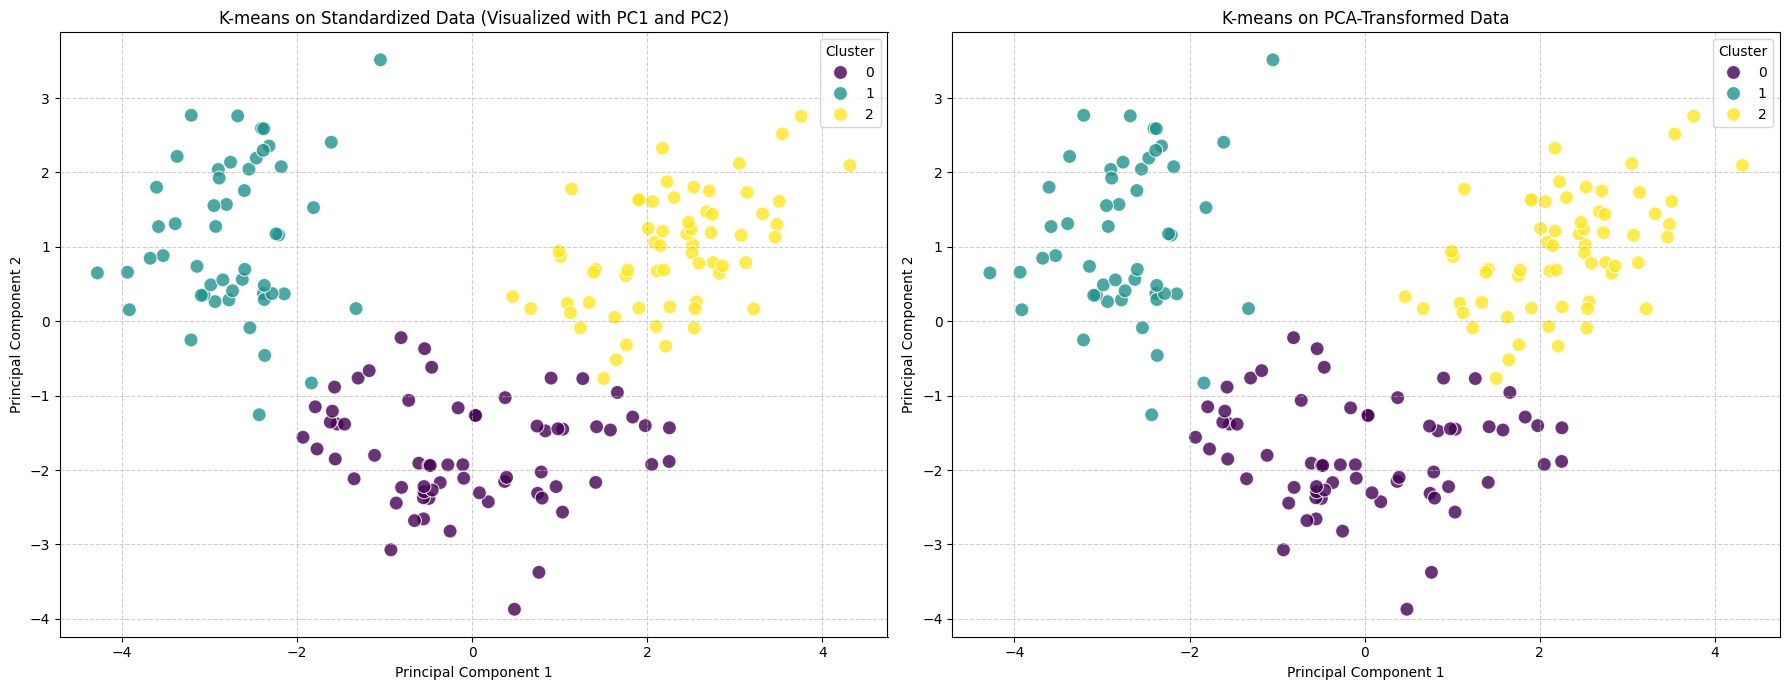

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure df_pca_transformed is a DataFrame with PC1 and PC2
# df_pca_transformed was already created as a DataFrame with PC1, PC2, etc.

# 1. Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: K-means on Standardized Data (Visualized with PC1 and PC2)
sns.scatterplot(
    x=df_pca_transformed['PC1'],
    y=df_pca_transformed['PC2'],
    hue=df_scaled_clusters['Cluster'], # Using clusters from original scaled data
    palette='viridis',
    s=100,
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title('K-means on Standardized Data (Visualized with PC1 and PC2)')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend(title='Cluster')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot 2: K-means on PCA-Transformed Data
sns.scatterplot(
    x=df_pca_transformed_clusters['PC1'],
    y=df_pca_transformed_clusters['PC2'],
    hue=df_pca_transformed_clusters['Cluster'], # Using clusters from PCA-transformed data
    palette='viridis',
    s=100,
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title('K-means on PCA-Transformed Data')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].legend(title='Cluster')
axes[1].grid(True, linestyle='--', alpha=0.6)

# Use plt.tight_layout() to prevent labels from overlapping
plt.tight_layout()

# Display the plots
plt.show()


## Summary:

The analysis revealed that:
*   **Key Findings:** The wine dataset has a clear underlying structure, as indicated by the Elbow Method suggesting 3 clusters, which aligns with the 'Type' column in the original data. PCA successfully reduced dimensionality from 13 features to 10 while retaining approximately 95% of the total variance, indicating significant redundancy or correlation among original features. Clustering performance, as measured by Silhouette Score and Davies-Bouldin Index, was slightly better when K-means was applied to PCA-transformed data compared to the original standardized data.
*   **Practical Implications of PCA and Clustering:** PCA can significantly reduce data dimensionality, which is beneficial for managing high-dimensional datasets and potentially improving clustering quality by filtering noise. Clustering (K-means in this case) helps identify natural groupings within data, which can reveal inherent structures or categories, such as different types of wine.
*   **Recommendations on When to Use Each Technique:**
    *   **Use PCA for Dimensionality Reduction:** Recommended for datasets with many features, especially when some are highly correlated, to improve computational efficiency and potentially cluster quality. It is also useful for mitigating the "curse of dimensionality" and for data visualization.
    *   **Use Clustering (after Standardization, optionally PCA):** Apply clustering when the goal is to discover inherent groups or segments within unlabeled data. Standardizing data is a crucial first step for distance-based clustering algorithms like K-means.